# Logistic Regression as a Neural Network
(partly following deeplearning.ai lab)

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## Parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [2]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))

    return s

In [3]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.]))))

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


### Initializing parameters



In [4]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.

    return w, b

In [5]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [6]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [7]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [8]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [9]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
w = [[ 0.99092423]
 [-1.08149946]]
b = [3.99591156]
dw = [[0.00128065]
 [0.01144573]]
db = [0.00041775]


Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`.

In [10]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

In [11]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]



Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [12]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Run the following cell to train your model.

#### 1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('res/bioresponse.csv')

X=data.drop('Activity',axis=1).to_numpy()
y=data['Activity'].to_numpy()

train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X, y, test_size = 0.25)

train_set_x, test_set_x = train_set_x.T, test_set_x.T
train_set_y, test_set_y = train_set_y.T, test_set_y.T

gradient_descent = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.680232
Cost after iteration 200: 0.673117
Cost after iteration 300: 0.666757
Cost after iteration 400: 0.660834
Cost after iteration 500: 0.655285
Cost after iteration 600: 0.650073
Cost after iteration 700: 0.645163
Cost after iteration 800: 0.640527
Cost after iteration 900: 0.636140
Cost after iteration 1000: 0.631981
Cost after iteration 1100: 0.628031
Cost after iteration 1200: 0.624271
Cost after iteration 1300: 0.620687
Cost after iteration 1400: 0.617265
Cost after iteration 1500: 0.613993
Cost after iteration 1600: 0.610860
Cost after iteration 1700: 0.607855
Cost after iteration 1800: 0.604970
Cost after iteration 1900: 0.602195
train accuracy: 73.05367934589407 %
test accuracy: 72.28144989339019 %


#### 2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.

In [14]:
from random import randrange
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []

    for i in range(num_iterations):

        j = randrange(X.shape[1])
        range_x = np.array([X[:,j]]).T
        range_y = np.array([Y[j]])

        # Cost and gradient calculation
        grads, cost = propagate(w,b,range_x,range_y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

def model_sgd(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [15]:
sgd_m = model_sgd(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.557120
Cost after iteration 200: 0.649229
Cost after iteration 300: 0.840815
Cost after iteration 400: 0.889271
Cost after iteration 500: 1.014570
Cost after iteration 600: 0.567231
Cost after iteration 700: 0.775340
Cost after iteration 800: 0.595186
Cost after iteration 900: 0.835882
Cost after iteration 1000: 0.380225
Cost after iteration 1100: 0.479131
Cost after iteration 1200: 0.628471
Cost after iteration 1300: 0.675934
Cost after iteration 1400: 0.975431
Cost after iteration 1500: 0.661794
Cost after iteration 1600: 1.064234
Cost after iteration 1700: 0.505852
Cost after iteration 1800: 0.887873
Cost after iteration 1900: 0.316050
train accuracy: 73.76466405972272 %
test accuracy: 71.32196162046908 %


#### 3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model?

GRADIENT DESCENT
train accuracy: 83.39850693210096 %
test accuracy: 75.90618336886993 %
STOHASTIC GRADIENT DESCENT
train accuracy: 74.86669036615713 %
test accuracy: 69.18976545842217 %
GRADIENT DESCENT
train accuracy: 79.2036971205119 %
test accuracy: 74.52025586353945 %
STOHASTIC GRADIENT DESCENT
train accuracy: 76.67970138642019 %
test accuracy: 72.28144989339019 %
GRADIENT DESCENT
train accuracy: 73.05367934589407 %
test accuracy: 72.28144989339019 %
STOHASTIC GRADIENT DESCENT
train accuracy: 72.02275151084251 %
test accuracy: 69.9360341151386 %
GRADIENT DESCENT
train accuracy: 55.24351226448631 %
test accuracy: 56.929637526652456 %
STOHASTIC GRADIENT DESCENT
train accuracy: 57.625311055812304 %
test accuracy: 58.63539445628998 %
GRADIENT DESCENT
train accuracy: 54.070387486669034 %
test accuracy: 54.6908315565032 %
STOHASTIC GRADIENT DESCENT
train accuracy: 54.070387486669034 %
test accuracy: 54.6908315565032 %


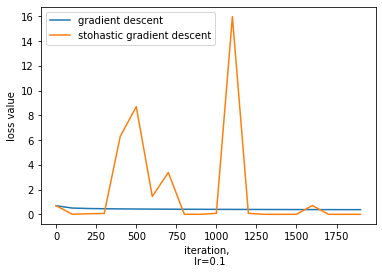

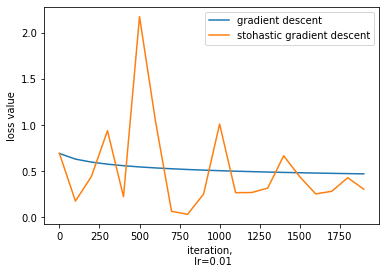

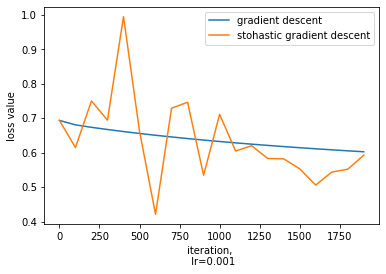

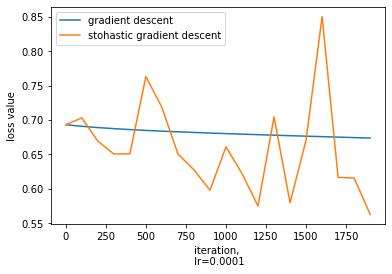

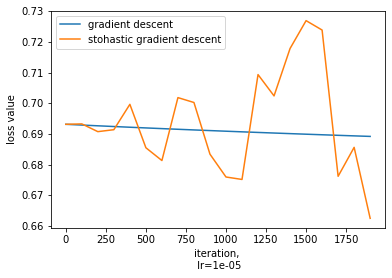

In [16]:
iter_count = 2000
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001]
range_values = list(filter(lambda x: x % 100 == 0, [i for i in range(iter_count)]))


for learning_rate in lr:
    print('GRADIENT DESCENT')
    gradient_m = model(train_set_x, train_set_y, test_set_x, test_set_y, iter_count, learning_rate)

    print('STOHASTIC GRADIENT DESCENT')
    sgd_model= model_sgd(train_set_x, train_set_y, test_set_x, test_set_y, iter_count, learning_rate)

    plt.plot(range_values, gradient_m['costs'], label="gradient descent")
    plt.plot(range_values, sgd_model['costs'], label="stohastic gradient descent")
    plt.xlabel('iteration, \n lr={}'.format(learning_rate))
    plt.ylabel('loss value')
    plt.legend()
    plt.show()

#### 4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.

In [27]:
import math

def optimize_adam(w, b, X, Y, num_iterations, eta = 0.01, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, print_cost = False):

    costs = []

    dim = X.shape[0]
    m_dw, m_db = initialize_with_zeros(dim)
    v_dw, v_db = initialize_with_zeros(dim)
    for i in range(1, num_iterations + 1):
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        #momentum
        # weights
        m_dw = beta1 * m_dw + (1 - beta1) * dw
        # bias
        m_db = beta1 * m_db + (1 - beta1) * db
        
        #weights
        v_dw = beta2 * v_dw + (1 - beta2) * (dw ** 2)
        # bias
        v_db = beta2 * v_db + (1 - beta2) * (db ** 2)

        m_dw_corr = m_dw / (1 - beta1 ** i)
        m_db_corr = m_db / (1 - beta1 ** i)
        v_dw_corr = v_dw / (1 - beta2 ** i)
        v_db_corr = v_db / (1 - beta2 ** i)

        w -= learning_rate * (m_dw_corr / (np.sqrt(v_dw_corr) + epsilon))
        b -= learning_rate * (m_db_corr / (np.sqrt(v_db_corr) + epsilon))

        # Record the costs
        if i % 100 == 0:
            if math.isnan(cost):
                cost = 0
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

def model_adam(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):


    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Adam
    parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, eta = learning_rate, print_cost = print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,}

    return d

adam_model_result = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, print_cost = True)

Cost after iteration 100: 0.685066
Cost after iteration 200: 0.679416
Cost after iteration 300: 0.674416
Cost after iteration 400: 0.669709
Cost after iteration 500: 0.665204
Cost after iteration 600: 0.660867
Cost after iteration 700: 0.656681
Cost after iteration 800: 0.652633
Cost after iteration 900: 0.648714
Cost after iteration 1000: 0.644916
Cost after iteration 1100: 0.641231
Cost after iteration 1200: 0.637653
Cost after iteration 1300: 0.634175
Cost after iteration 1400: 0.630791
Cost after iteration 1500: 0.627495
Cost after iteration 1600: 0.624283
Cost after iteration 1700: 0.621150
Cost after iteration 1800: 0.618090
Cost after iteration 1900: 0.615101
Cost after iteration 2000: 0.612179
train accuracy: 70.67188055456808 %
test accuracy: 69.5095948827292 %


In [23]:
print("gradient descend")
print("train accuracy: {} %".format(100 - np.mean(np.abs(gradient_descent['Y_prediction_train'] - train_set_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(gradient_descent['Y_prediction_test'] - test_set_y)) * 100))

print("stohastic gradient descend")
print("train accuracy: {} %".format(100 - np.mean(np.abs(sgd_m['Y_prediction_train'] - train_set_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(sgd_m['Y_prediction_test'] - test_set_y)) * 100))

print("adam algorithm")
print("train accuracy: {} %".format(100 - np.mean(np.abs(adam_model_result['Y_prediction_train'] - train_set_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(adam_model_result['Y_prediction_test'] - test_set_y)) * 100))

gradient descend
train accuracy: 73.05367934589407 %
test accuracy: 72.28144989339019 %
stohastic gradient descend
train accuracy: 73.76466405972272 %
test accuracy: 71.32196162046908 %
adam algorithm
train accuracy: 96.80056878777106 %
test accuracy: 71.64179104477611 %


GRADIENT DESCENT
train accuracy: 83.39850693210096 %
test accuracy: 75.90618336886993 %
STOHASTIC GRADIENT DESCENT
train accuracy: 75.61322431567721 %
test accuracy: 70.78891257995735 %
ADAM GRADIENT DESCENT
train accuracy: 96.80056878777106 %
test accuracy: 71.64179104477611 %
GRADIENT DESCENT
train accuracy: 79.2036971205119 %
test accuracy: 74.52025586353945 %
STOHASTIC GRADIENT DESCENT
train accuracy: 75.54212584429435 %
test accuracy: 71.21535181236675 %
ADAM GRADIENT DESCENT
train accuracy: 94.34767152506221 %
test accuracy: 71.64179104477611 %
GRADIENT DESCENT
train accuracy: 73.05367934589407 %
test accuracy: 72.28144989339019 %
STOHASTIC GRADIENT DESCENT
train accuracy: 66.51261997867046 %
test accuracy: 65.56503198294243 %
ADAM GRADIENT DESCENT
train accuracy: 90.15286171347316 %
test accuracy: 75.69296375266525 %
GRADIENT DESCENT
train accuracy: 55.24351226448631 %
test accuracy: 56.929637526652456 %
STOHASTIC GRADIENT DESCENT
train accuracy: 56.94987557767508 %
test accurac

C:\Users\nikita\anaconda3\envs\p3.7\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\nikita\anaconda3\envs\p3.7\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
C:\Users\nikita\anaconda3\envs\p3.7\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


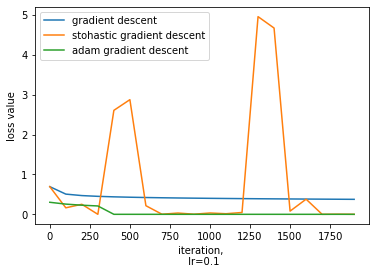

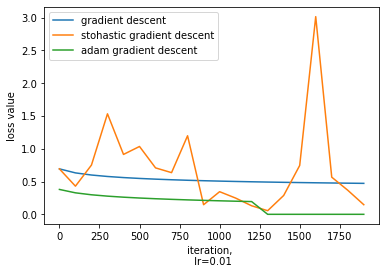

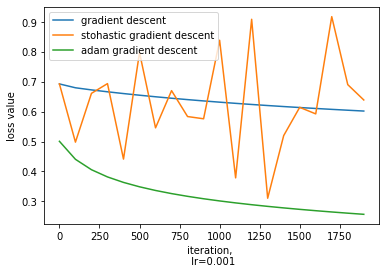

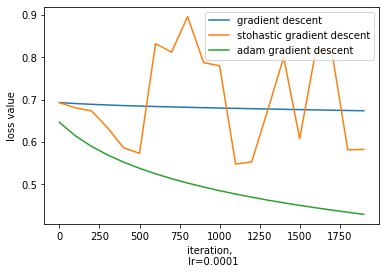

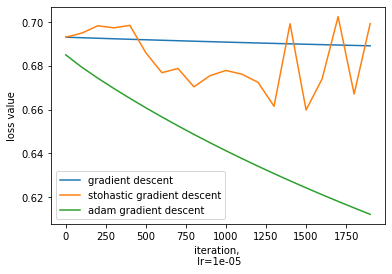

In [28]:
iter_count = 2000
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001]
range_values = list(filter(lambda x: x % 100 == 0, [i for i in range(iter_count)]))


for learning_rate in lr:
    print('GRADIENT DESCENT')
    gradient_m = model(train_set_x, train_set_y, test_set_x, test_set_y, iter_count, learning_rate)

    print('STOHASTIC GRADIENT DESCENT')
    sgd_model= model_sgd(train_set_x, train_set_y, test_set_x, test_set_y, iter_count, learning_rate)

    print('ADAM GRADIENT DESCENT')
    adam_model = model_adam(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = iter_count, learning_rate=learning_rate, print_cost=False)

    plt.plot(range_values, gradient_m['costs'], label="gradient descent")
    plt.plot(range_values, sgd_model['costs'], label="stohastic gradient descent")
    plt.plot(range_values, adam_model['costs'], label="adam gradient descent")
    plt.xlabel('iteration, \n lr={}'.format(learning_rate))
    plt.ylabel('loss value')
    plt.legend()
    plt.show()


Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
